In [2]:
import pandas as pd

# Load the datasets
sells = pd.read_csv('https://raw.githubusercontent.com/santimcs/obsidian-git-sync/main/Data/sells.csv')
buys = pd.read_csv('https://raw.githubusercontent.com/santimcs/obsidian-git-sync/main/Data/buys.csv')
stocks = pd.read_csv('https://raw.githubusercontent.com/santimcs/obsidian-git-sync/main/Data/stocks.csv')
dividends = pd.read_csv('https://raw.githubusercontent.com/santimcs/obsidian-git-sync/main/Data/dividends.csv')

# Merge the datasets
full_sales = sells.merge(buys, left_on='buy_id', right_on='id', suffixes=('_sell', '_buy'))
full_sales = full_sales.merge(stocks, left_on='stock_id', right_on='id', suffixes=('_sales', '_stock'))

# Display the merged dataset
full_sales.head()

,id_sell,buy_id,date_sell,price_sell,fee_sell,vat_sell,net_sell,days,profit,percent,...,fee_buy,vat_buy,status,net_buy,kind,chart_buy,id,name,category_id,website
0,1034,1266,2023-06-23,10.70,66.45,4.65,32028.90,3,1361.13,4.43831,...,63.34,4.43,Sold,30667.77,HD,NaN,129,CPNREIT,3,NaN
1,620,468,2018-02-06,22.40,1251.94,87.64,603460.42,1687,155079.49,34.58655,...,926.10,64.83,Sold,448380.93,DIV,NaN,129,CPNREIT,3,NaN
2,540,664,2020-03-13,27.75,172.33,12.06,83065.61,91,-4878.74,-5.54753,...,181.64,12.71,Sold,87944.35,DIV,NaN,129,CPNREIT,3,NaN
3,539,662,2020-03-13,27.75,172.33,12.06,83065.61,95,-11643.70,-12.29415,...,195.62,13.69,Sold,94709.31,DIV,NaN,129,CPNREIT,3,NaN
4,538,654,2020-03-13,27.75,229.77,16.08,110754.15,123,-17529.36,-13.66455,...,264.96,18.55,Sold,128283.51,DIV,NaN,129,CPNREIT,3,NaN


In [5]:
full_sales.dtypes

id_sell          int64
buy_id           int64
date_sell       object
price_sell     float64
fee_sell       float64
vat_sell       float64
net_sell       float64
days             int64
profit         float64
percent        float64
yearly         float64
sequence         int64
chart_sell      object
dividend_id      int64
id_buy           int64
stock_id         int64
date_buy        object
qty              int64
price_buy      float64
fee_buy        float64
vat_buy        float64
status          object
net_buy        float64
kind            object
chart_buy       object
id               int64
name            object
category_id      int64
website         object
amt_sell       float64
dtype: object

In [4]:
full_sales['amt_sell'] = full_sales['price_sell'] * full_sales['qty']

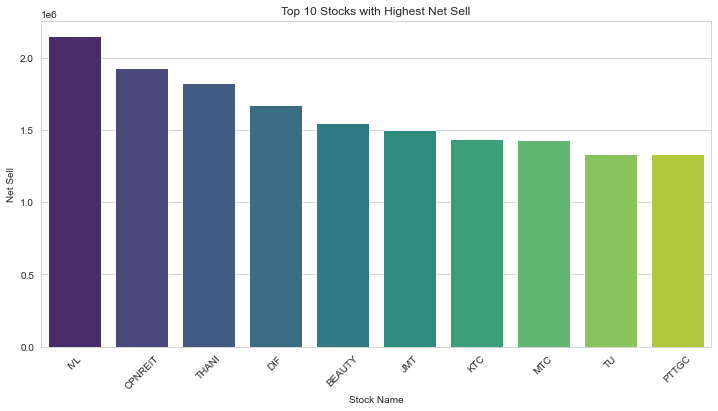

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visuals
sns.set_style('whitegrid')

# Create a bar plot for the top 10 stocks with the highest net sell
top_10_stocks = full_sales.groupby('name')['net_sell'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_stocks.index, y=top_10_stocks.values, palette='viridis')
plt.title('Top 10 Stocks with Highest Net Sell')
plt.xlabel('Stock Name')
plt.ylabel('Net Sell')
plt.xticks(rotation=45)
plt.show()

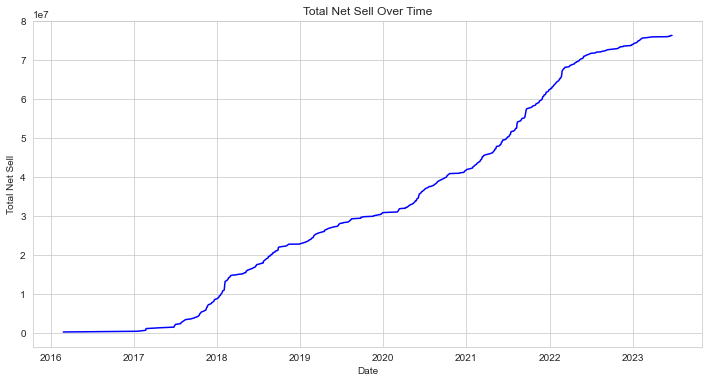

In [7]:
# Convert the sell date to datetime format
full_sales['date_sell'] = pd.to_datetime(full_sales['date_sell'])

# Calculate the total net sell over time
net_sell_over_time = full_sales.groupby('date_sell')['net_sell'].sum().cumsum()

# Create a line plot for the total net sell over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=net_sell_over_time.index, y=net_sell_over_time.values, color='blue')
plt.title('Total Net Sell Over Time')
plt.xlabel('Date')
plt.ylabel('Total Net Sell')
plt.show()

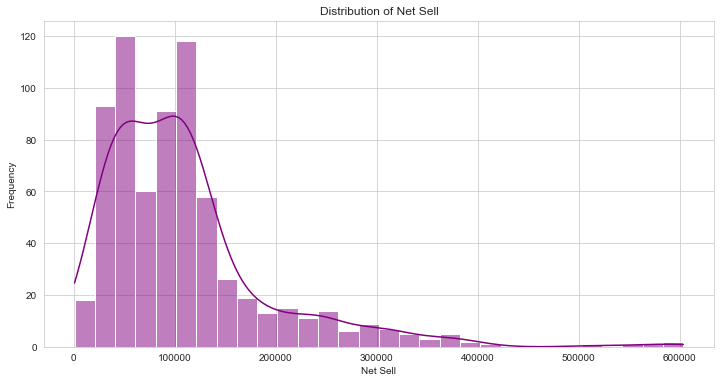

In [8]:
# Create a histogram for the distribution of the net sell
plt.figure(figsize=(12, 6))
sns.histplot(full_sales['net_sell'], bins=30, color='purple', kde=True)
plt.title('Distribution of Net Sell')
plt.xlabel('Net Sell')
plt.ylabel('Frequency')
plt.show()

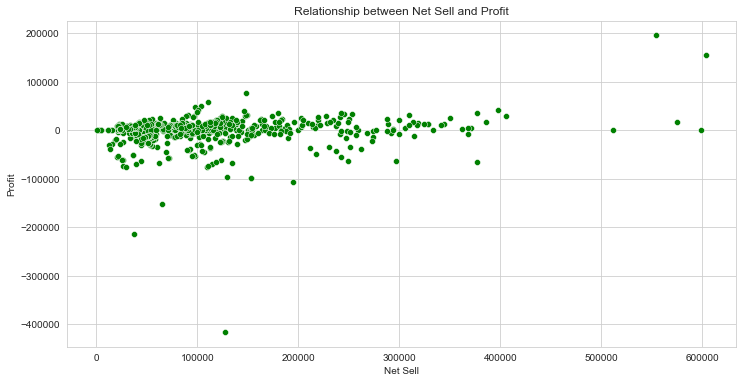

In [9]:
# Create a scatter plot for the relationship between the net sell and the profit
plt.figure(figsize=(12, 6))
sns.scatterplot(x=full_sales['net_sell'], y=full_sales['profit'], color='green')
plt.title('Relationship between Net Sell and Profit')
plt.xlabel('Net Sell')
plt.ylabel('Profit')
plt.show()

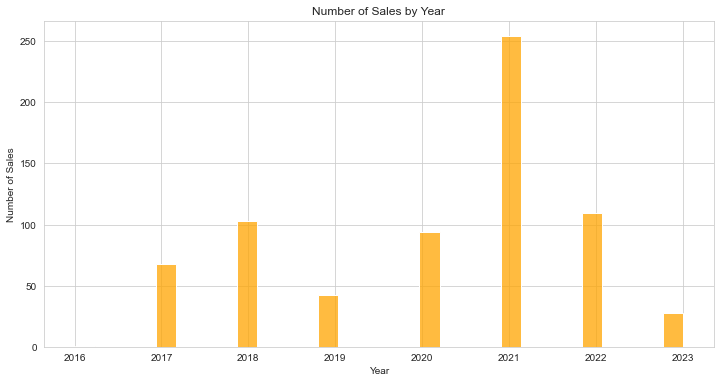

In [10]:
# Extract the year from the sell date
full_sales['year'] = full_sales['date_sell'].dt.year

# Create a histogram for the number of sales by year
plt.figure(figsize=(12, 6))
sns.histplot(full_sales['year'], bins=30, color='orange', kde=False)
plt.title('Number of Sales by Year')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.show()

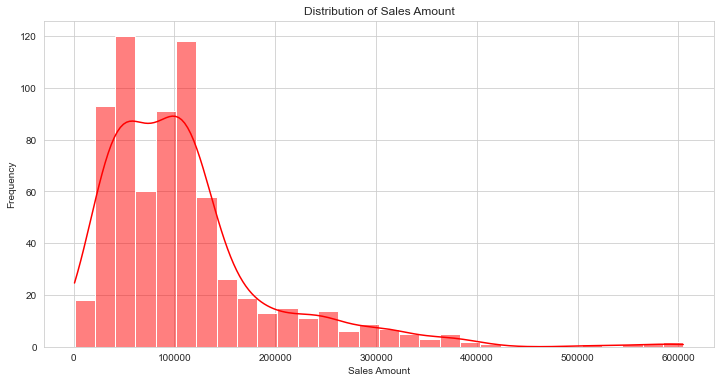

In [11]:
# Create a histogram for the distribution of the sales amount
plt.figure(figsize=(12, 6))
sns.histplot(full_sales['amt_sell'], bins=30, color='red', kde=True)
plt.title('Distribution of Sales Amount')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()

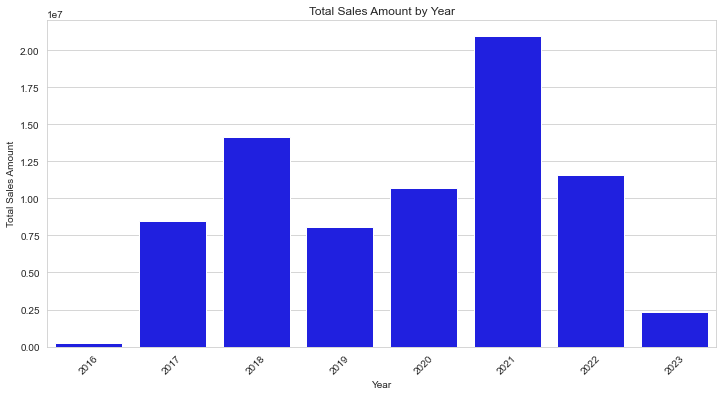

In [12]:
# Calculate the total sales amount by year
sales_amount_by_year = full_sales.groupby('year')['amt_sell'].sum()

# Create a histogram for the total sales amount by year
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_amount_by_year.index, y=sales_amount_by_year.values, color='blue')
plt.title('Total Sales Amount by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

In [13]:
sales_amount_by_year

year
2016      231000.0
2017     8451890.0
2018    14167950.0
2019     8085675.0
2020    10699070.0
2021    20976595.0
2022    11600885.0
2023     2352250.0
Name: amt_sell, dtype: float64

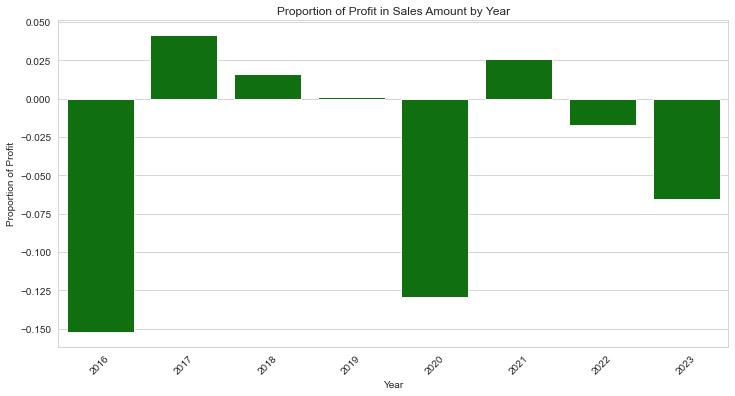

In [14]:
# Calculate the total profit by year
profit_by_year = full_sales.groupby('year')['profit'].sum()

# Calculate the proportion of profit in sales amount
profit_proportion = profit_by_year / sales_amount_by_year

# Create a bar plot for the proportion of profit in sales amount by year
plt.figure(figsize=(12, 6))
sns.barplot(x=profit_proportion.index, y=profit_proportion.values, color='green')
plt.title('Proportion of Profit in Sales Amount by Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Profit')
plt.xticks(rotation=45)
plt.show()

In [15]:
profit_proportion

year
2016   -0.151952
2017    0.041306
2018    0.015790
2019    0.001288
2020   -0.129502
2021    0.025565
2022   -0.017362
2023   -0.065698
dtype: float64

In [16]:
dividends.dtypes

id            int64
stock_id      int64
name         object
year          int64
quarter       int64
number        int64
ppu         float64
amt         float64
net         float64
x_date       object
p_date       object
dtype: object

In [17]:
# Display the first few rows of the dividends dataset
dividends.head()

,id,stock_id,name,year,quarter,number,ppu,amt,net,x_date,p_date
0,403,156,WHAIR,2023,1,50000,0.1369,6845.0,6160.5,2023-05-22,2023-06-22
1,402,208,TFFIF,2023,1,20000,0.1032,2064.0,2064.0,2023-05-31,2023-06-19
2,401,27,IVL,2023,1,7200,0.2500,1800.0,1620.0,2023-05-26,2023-06-14
3,400,169,GVREIT,2023,1,30000,0.1950,5850.0,5265.0,2023-05-26,2023-06-12
4,399,172,WHART,2023,1,30000,0.1915,5745.0,5170.5,2023-05-23,2023-06-09


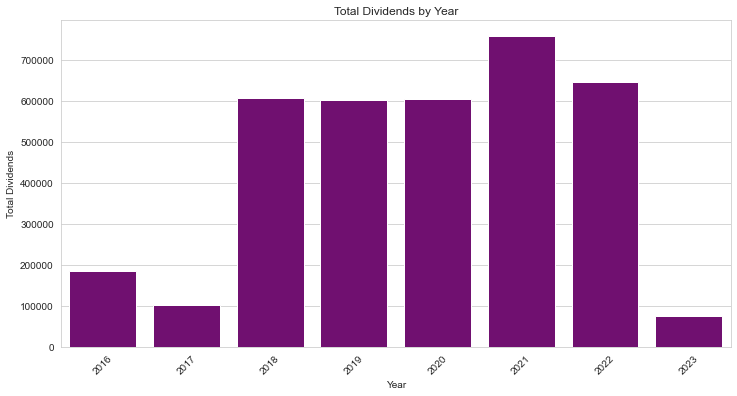

In [18]:
# Calculate the total dividends by year
dividends_by_year = dividends.groupby('year')['amt'].sum()

# Create a bar plot for the total dividends by year
plt.figure(figsize=(12, 6))
sns.barplot(x=dividends_by_year.index, y=dividends_by_year.values, color='purple')
plt.title('Total Dividends by Year')
plt.xlabel('Year')
plt.ylabel('Total Dividends')
plt.xticks(rotation=45)
plt.show()

In [19]:
dividends_by_year

year
2016    185537.60
2017    102343.50
2018    605859.60
2019    601462.95
2020    603486.53
2021    758673.21
2022    646064.60
2023     74374.00
Name: amt, dtype: float64

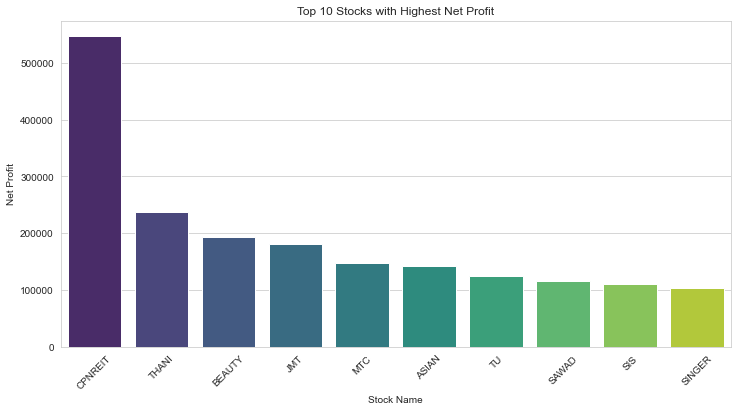

In [20]:
# Create a bar plot for the top 10 stocks with the highest net profit
top_10_stocks_profit = full_sales.groupby('name')['profit'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_stocks_profit.index, y=top_10_stocks_profit.values, palette='viridis')
plt.title('Top 10 Stocks with Highest Net Profit')
plt.xlabel('Stock Name')
plt.ylabel('Net Profit')
plt.xticks(rotation=45)
plt.show()

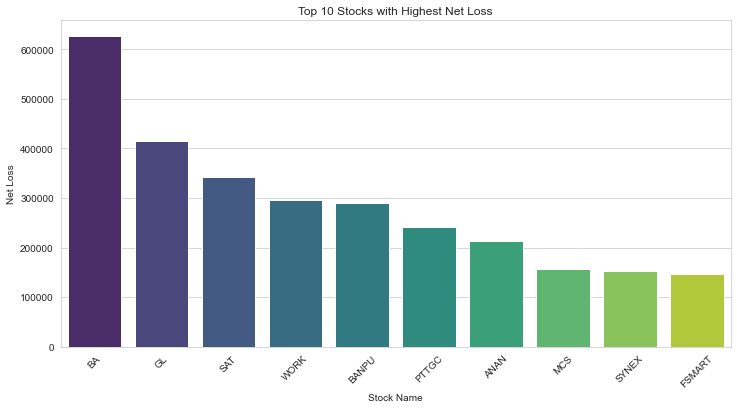

In [23]:
# Calculate the net loss for each stock
full_sales['net_loss'] = full_sales['net_buy'] - full_sales['net_sell']

# Create a bar plot for the top 10 stocks with the highest net loss
top_10_stocks_loss = full_sales.groupby('name')['net_loss'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_stocks_loss.index, y=top_10_stocks_loss.values, palette='viridis')
plt.title('Top 10 Stocks with Highest Net Loss')
plt.xlabel('Stock Name')
plt.ylabel('Net Loss')
plt.xticks(rotation=45)
plt.show()

In [24]:
top_10_stocks_loss

name
BA        627323.62
GL        415882.22
SAT       342630.84
WORK      295292.41
BANPU     289171.98
PTTGC     242224.98
ANAN      212334.18
MCS       156208.91
SYNEX     152084.13
FSMART    145497.00
Name: net_loss, dtype: float64

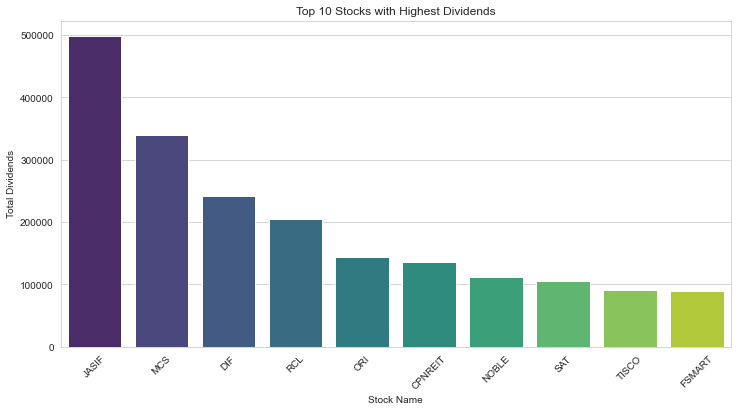

In [25]:
# Calculate the total dividends by stock
dividends_by_stock = dividends.groupby('name')['amt'].sum()

# Get the top 10 stocks with the highest dividends
top_10_dividend_stocks = dividends_by_stock.sort_values(ascending=False).head(10)

# Create a bar plot for the top 10 stocks with the highest dividends
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_dividend_stocks.index, y=top_10_dividend_stocks.values, palette='viridis')
plt.title('Top 10 Stocks with Highest Dividends')
plt.xlabel('Stock Name')
plt.ylabel('Total Dividends')
plt.xticks(rotation=45)
plt.show()

In [26]:
top_10_dividend_stocks

name
JASIF      498200.0
MCS        339050.0
DIF        241639.5
RCL        204000.0
ORI        144350.0
CPNREIT    135443.0
NOBLE      112200.0
SAT        105300.0
TISCO       91400.0
FSMART      89160.0
Name: amt, dtype: float64

C:\Users\User\AppData\Local\Temp/ipykernel_32116/505030605.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_2023['profit_percent'] = (sales_2023['profit'] / sales_2023['amt_sell']) * 100


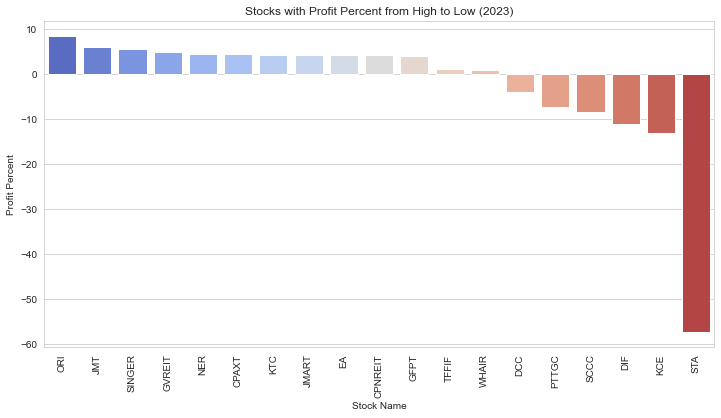

In [29]:
# Extract the year from the sell date
full_sales['year_sell'] = full_sales['date_sell'].dt.year

# Filter the sales data for the year 2023
sales_2023 = full_sales[full_sales['year_sell'] == 2023]

# Calculate the profit percent for each stock
sales_2023['profit_percent'] = (sales_2023['profit'] / sales_2023['amt_sell']) * 100

# Calculate the average profit percent by stock
profit_percent_by_stock = sales_2023.groupby('name')['profit_percent'].mean()

# Sort the stocks by profit percent from high to low
profit_percent_by_stock = profit_percent_by_stock.sort_values(ascending=False)

# Create a bar plot for the stocks with profit percent from high to low
plt.figure(figsize=(12, 6))
sns.barplot(x=profit_percent_by_stock.index, y=profit_percent_by_stock.values, palette='coolwarm')
plt.title('Stocks with Profit Percent from High to Low (2023)')
plt.xlabel('Stock Name')
plt.ylabel('Profit Percent')
plt.xticks(rotation=90)
plt.show()

In [30]:
profit_percent_by_stock

name
ORI         8.505387
JMT         6.045051
SINGER      5.553172
GVREIT      4.887947
NER         4.526694
CPAXT       4.509142
KTC         4.329476
JMART       4.329468
EA          4.254883
CPNREIT     4.240280
GFPT        4.147318
TFFIF       1.068515
WHAIR       0.841910
DCC        -3.947220
PTTGC      -7.354805
SCCC       -8.346877
DIF       -10.992609
KCE       -13.050595
STA       -57.432145
Name: profit_percent, dtype: float64